In [1]:
#| echo: false 

# We are suppressing warnings for now. Comment lines below if you want to see the warnings, as they tend to be informative.
import warnings
warnings.filterwarnings('ignore')

# Lab: Clustering and Ground Truth


We are going to use the Wine Quality Dataset from @cortezWineQuality2009 that you may be familiar with by now (but if you don't, tou can find more information about it here: <https://doi.org/10.24432/C56S3T>).

## Data Wrangling


In [2]:
import pandas as pd

df = pd.read_csv('data/wine.csv')

Look at our data.

In [3]:
df.head()

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0             5.64  1.04                          3.92      1065  
1             4.38  1.05                          3.40      1050  
2             5.68  1.03                          3.17      1185  
3             7.80  0.86                          3.45      1480  
4             4.32  1.04                          2.93       735

There is a column called Class label that gives us the ground truth. The wines come from three different cultivars. Knowing the actual grouping helps us to identify how well our methods can capture this ground truth.

Following our process above, we should first get a sense of our data.

In [4]:
df.describe()

Class label     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count   178.000000  178.000000  178.000000  178.000000         178.000000   
mean      1.938202   13.000618    2.336348    2.366517          19.494944   
std       0.775035    0.811827    1.117146    0.274344           3.339564   
min       1.000000   11.030000    0.740000    1.360000          10.600000   
25%       1.000000   12.362500    1.602500    2.210000          17.200000   
50%       2.000000   13.050000    1.865000    2.360000          19.500000   
75%       3.000000   13.677500    3.082500    2.557500          21.500000   
max       3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines     Proline   
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

No missing data. The scales of our features vary (e.g., Magnesium is in the 100s whereas Hue is in the low single digits).

How about our feature distributions?

[Text(0, 0, 'Alcohol'),
 Text(1, 0, 'Malic acid'),
 Text(2, 0, 'Ash'),
 Text(3, 0, 'Alcalinity of ash'),
 Text(4, 0, 'Magnesium'),
 Text(5, 0, 'Total phenols'),
 Text(6, 0, 'Flavanoids'),
 Text(7, 0, 'Nonflavanoid phenols'),
 Text(8, 0, 'Proanthocyanins'),
 Text(9, 0, 'Color intensity'),
 Text(10, 0, 'Hue'),
 Text(11, 0, 'OD280/OD315 of diluted wines'),
 Text(12, 0, 'Proline ')]

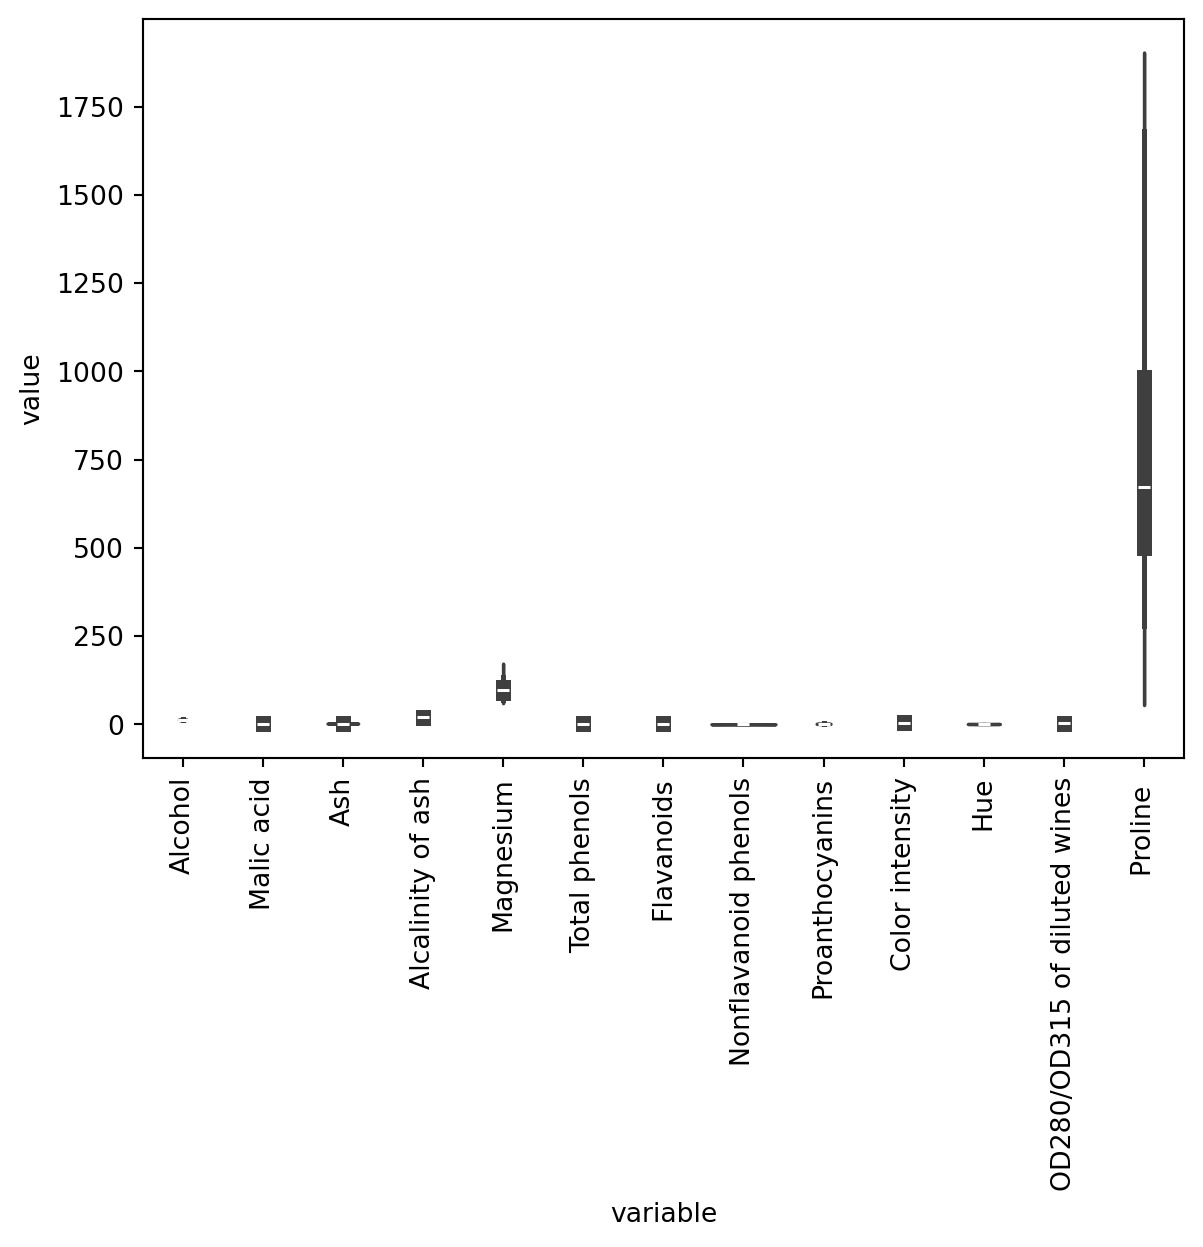

In [5]:
# Reshape from wide to long format, so we can easily view all variables in a single plot.
df_long = df.melt(id_vars='Class label')

import seaborn as sns

# Create seaborn violin plot
my_plot = sns.violinplot(data = df_long, x = 'variable', y = 'value')

# Rotate x-axis labels
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

As you can see, the scale of the different variables diffes enormously (this is specially true with `Proline` -refer to the output after `df.describe()`), so it makes sense to normalise our data.

### Normalise data

::: callout-warning

Please note that `Class label` is a numerical column that in fact describes the ground truth categories, so it doesn't make sense to normalise that variable. Therefore, **we should exclude `Class label` from the normalisation.**

:::

In [6]:
# Store labels as a variable before removing them from the dataframe
class_labels = df["Class label"]

df_subset = df.iloc[:,1:]

from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df_subset), columns = df_subset.columns)

# Re-add class labels in the first position
df_norm.insert(0, "Class label", class_labels)

df_norm


Class label   Alcohol  Malic acid       Ash  Alcalinity of ash  \
0              1  0.842105    0.191700  0.572193           0.257732   
1              1  0.571053    0.205534  0.417112           0.030928   
2              1  0.560526    0.320158  0.700535           0.412371   
3              1  0.878947    0.239130  0.609626           0.319588   
4              1  0.581579    0.365613  0.807487           0.536082   
..           ...       ...         ...       ...                ...   
173            3  0.705263    0.970356  0.582888           0.510309   
174            3  0.623684    0.626482  0.598930           0.639175   
175            3  0.589474    0.699605  0.481283           0.484536   
176            3  0.563158    0.365613  0.540107           0.484536   
177            3  0.815789    0.664032  0.737968           0.716495   

     Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
0     0.619565       0.627586    0.573840              0.283019   
1     0.326087       0.575862    0.510549              0.245283   
2     0.336957       0.627586    0.611814              0.320755   
3     0.467391       0.989655    0.664557              0.207547   
4     0.521739       0.627586    0.495781              0.490566   
..         ...            ...         ...                   ...   
173   0.271739       0.241379    0.056962              0.735849   
174   0.347826       0.282759    0.086498              0.566038   
175   0.543478       0.210345    0.073840              0.566038   
176   0.543478       0.231034    0.071730              0.754717   
177   0.282609       0.368966    0.088608              0.811321   

     Proanthocyanins  Color intensity       Hue  OD280/OD315 of diluted wines  \
0           0.593060         0.372014  0.455285                      0.970696   
1           0.274448         0.264505  0.463415                      0.780220   
2           0.757098         0.375427  0.447154                      0.695971   
3           0.558360         0.556314  0.308943                      0.798535   
4           0.444795         0.259386  0.455285                      0.608059   
..               ...              ...       ...                           ...   
173         0.205047         0.547782  0.130081                      0.172161   
174         0.315457         0.513652  0.178862                      0.106227   
175         0.296530         0.761092  0.089431                      0.106227   
176         0.331230         0.684300  0.097561                      0.128205   
177         0.296530         0.675768  0.105691                      0.120879   

     Proline   
0    0.561341  
1    0.550642  
2    0.646933  
3    0.857347  
4    0.325963  
..        ...  
173  0.329529  
174  0.336662  
175  0.397290  
176  0.400856  
177  0.201141  

[178 rows x 14 columns]

[Text(0, 0, 'Alcohol'),
 Text(1, 0, 'Malic acid'),
 Text(2, 0, 'Ash'),
 Text(3, 0, 'Alcalinity of ash'),
 Text(4, 0, 'Magnesium'),
 Text(5, 0, 'Total phenols'),
 Text(6, 0, 'Flavanoids'),
 Text(7, 0, 'Nonflavanoid phenols'),
 Text(8, 0, 'Proanthocyanins'),
 Text(9, 0, 'Color intensity'),
 Text(10, 0, 'Hue'),
 Text(11, 0, 'OD280/OD315 of diluted wines'),
 Text(12, 0, 'Proline ')]

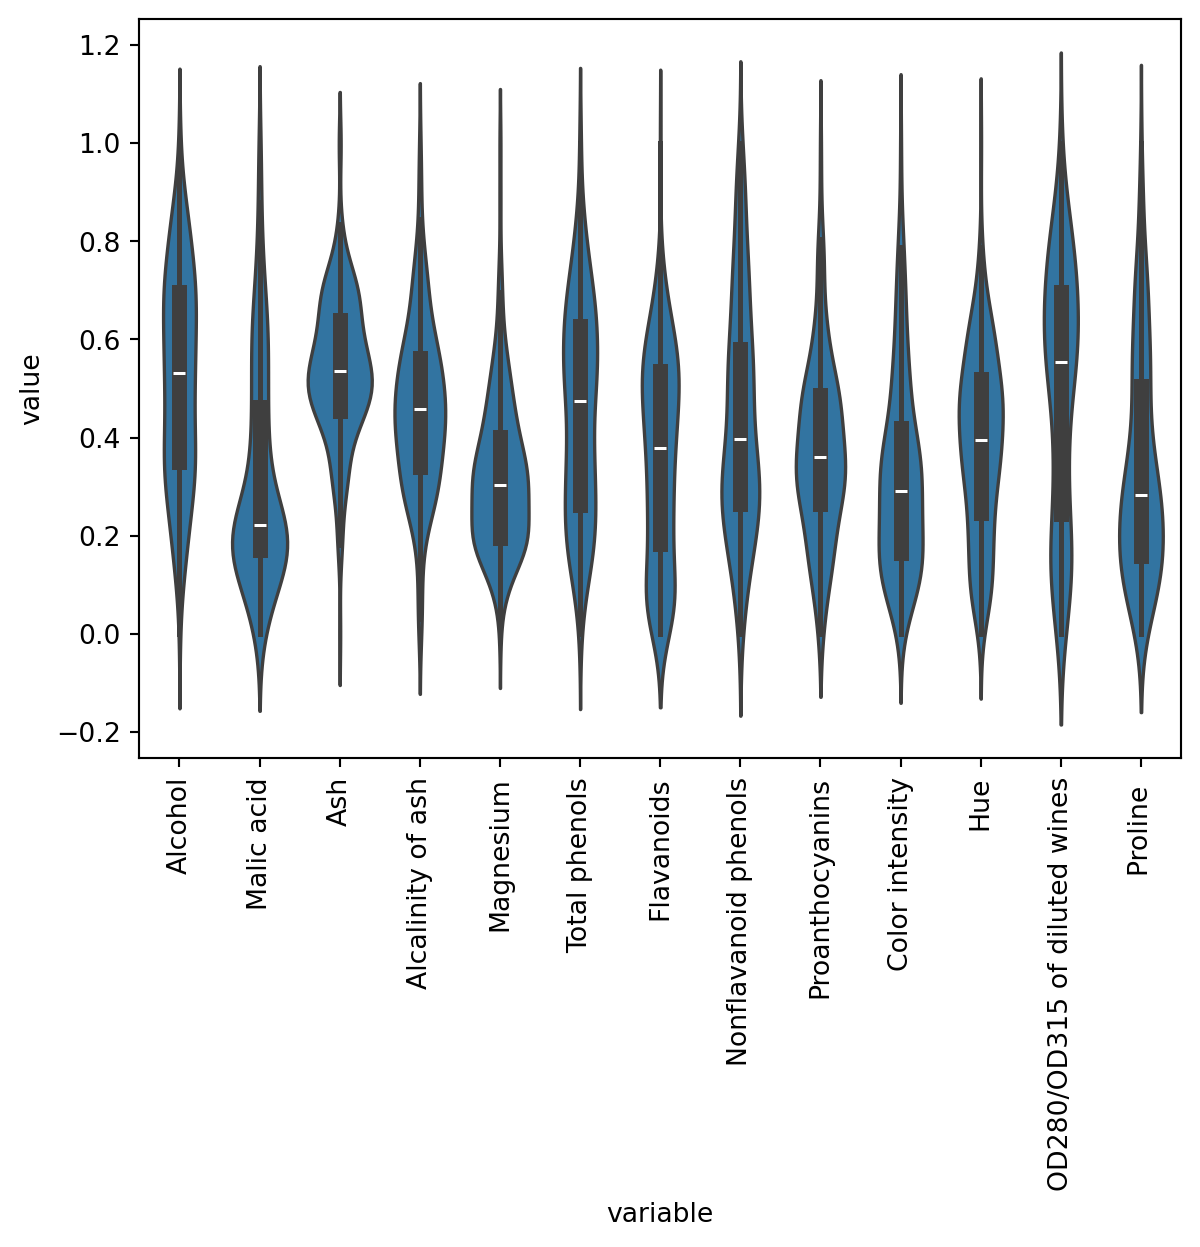

In [7]:
# Reshape from wide to long format
df_long = df_norm.melt(id_vars='Class label')

# Create seaborn violin plot
my_plot = sns.violinplot(data = df_long, x = 'variable', y = 'value')

# Rotate x-axis labels
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)



Are there any patterns?

How about a pairplot?

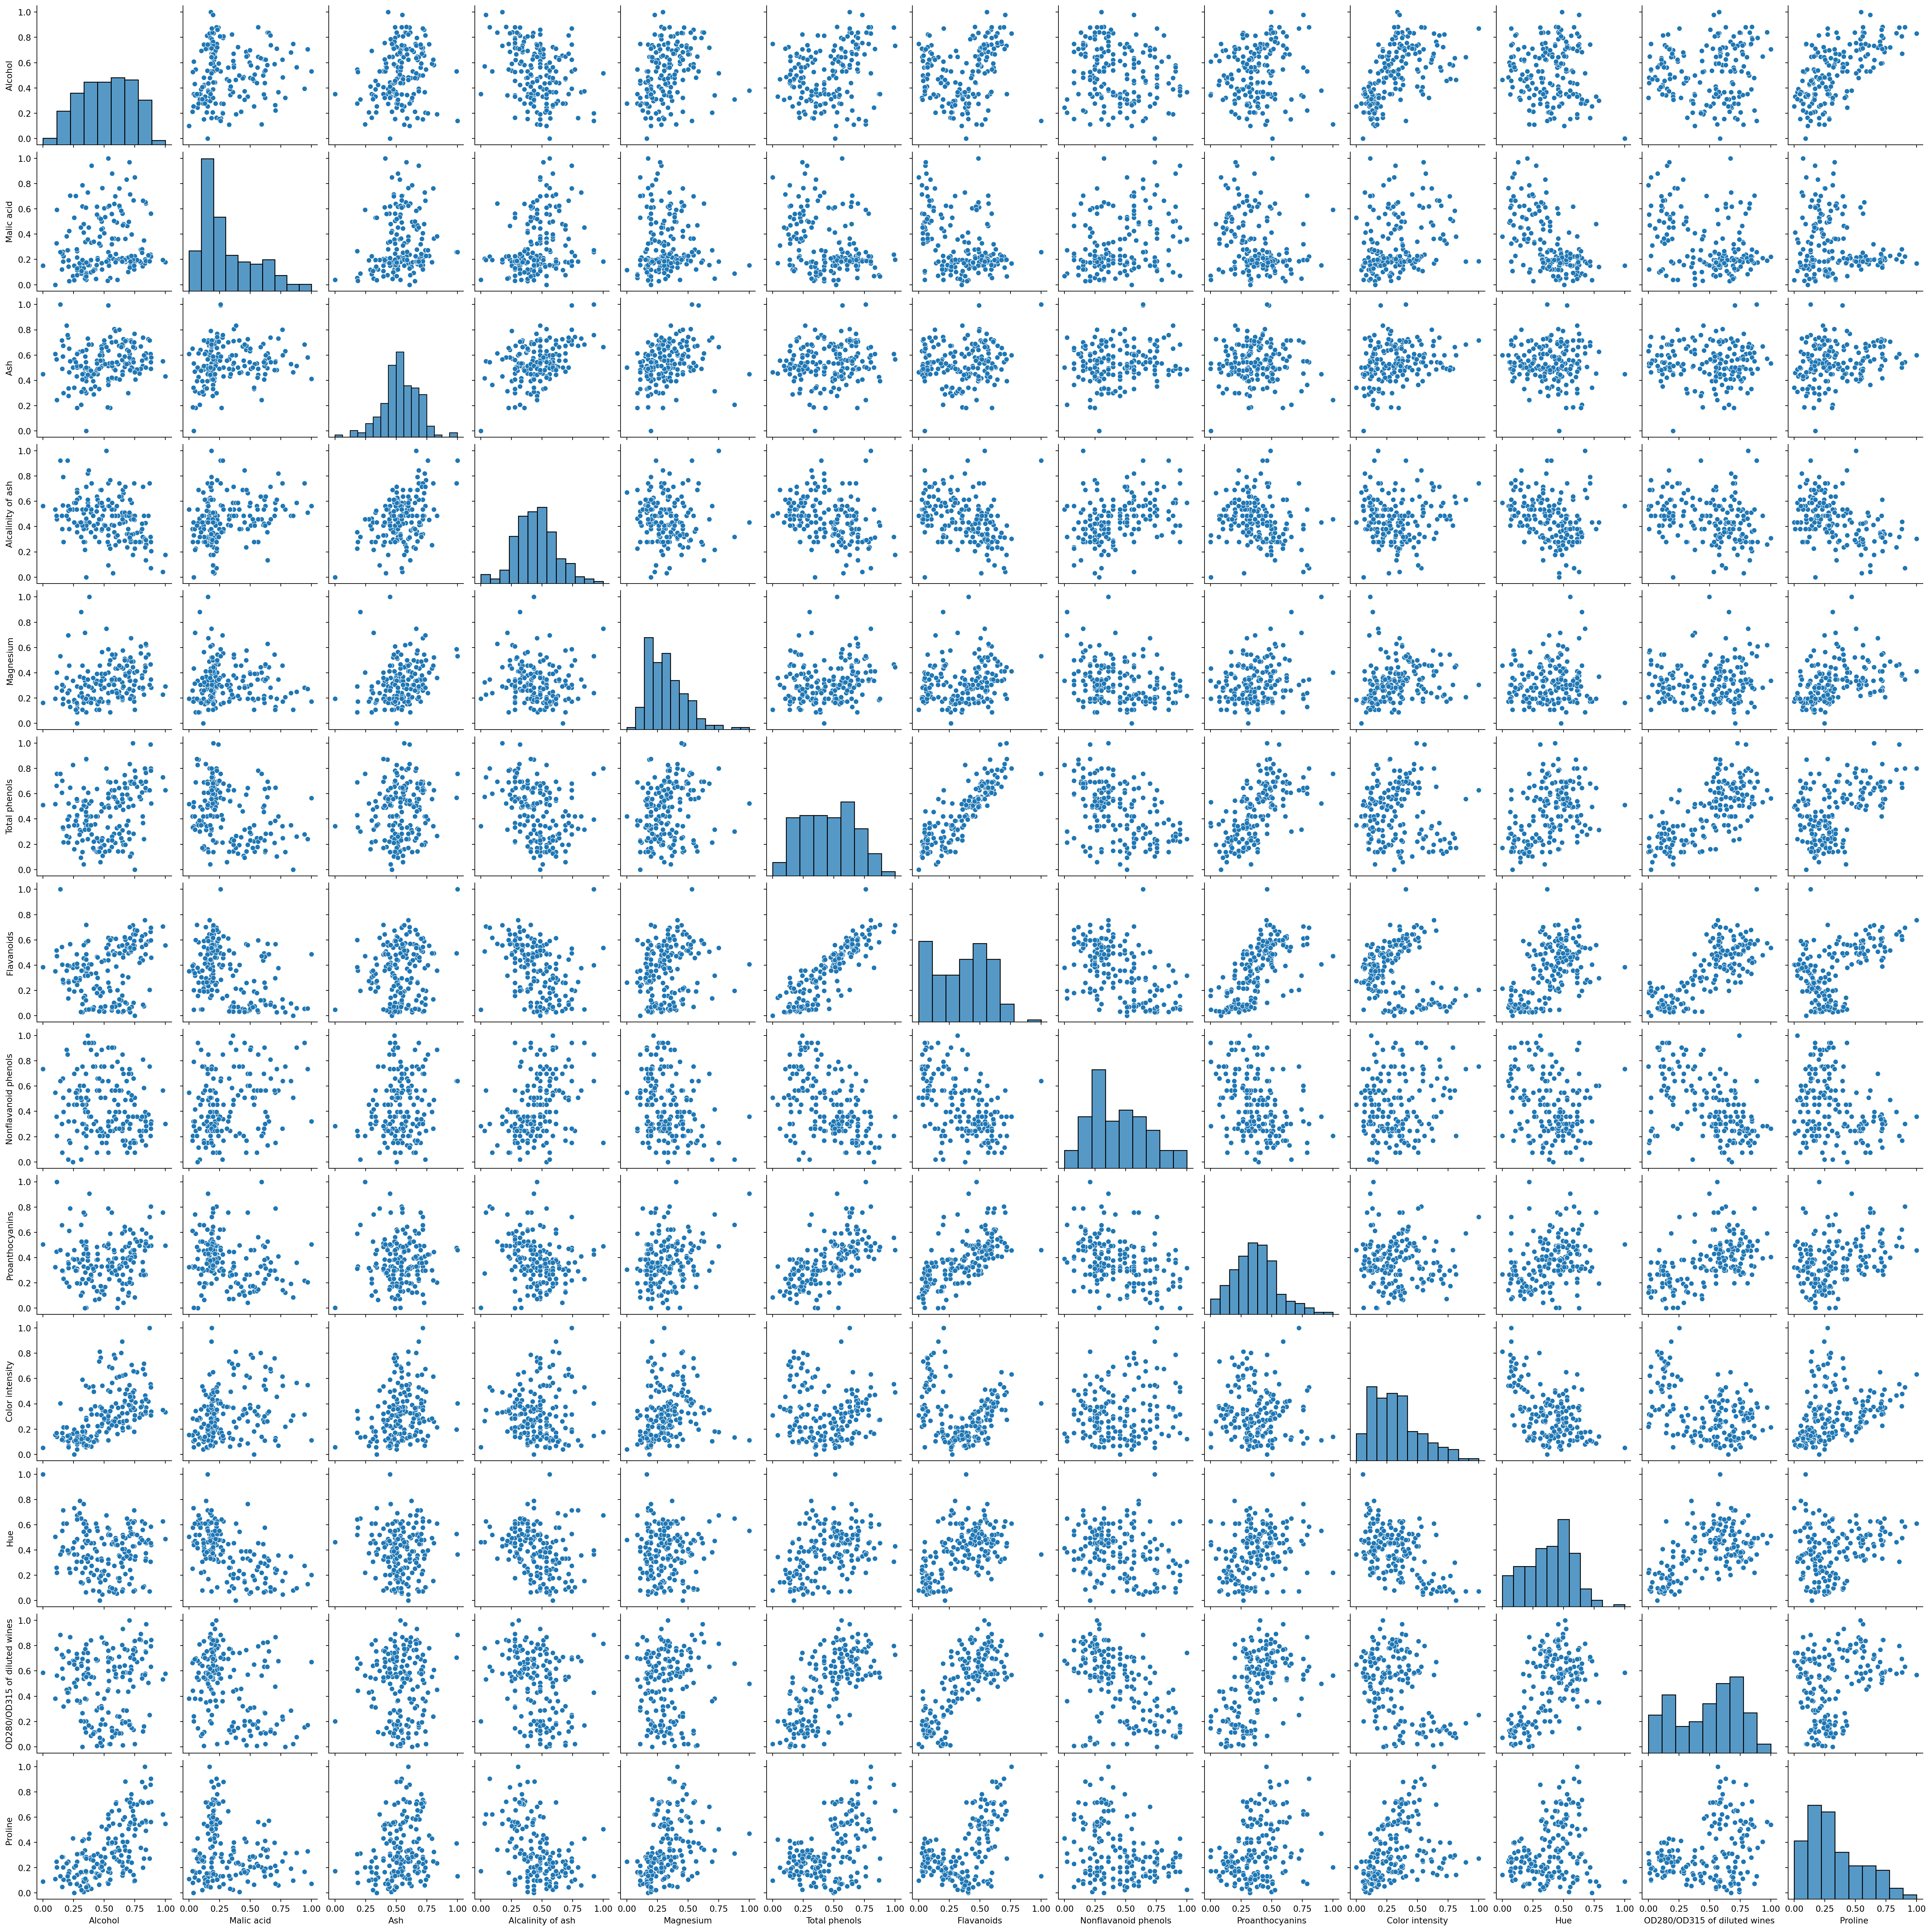

In [8]:
#| column: page
sns.pairplot(data = df_norm.iloc[:,1:])

Hmm, a few interesting correlations. Some of our variables are skewed. We could apply some PCA here to look at fewer dimension or even log transform some of the skewed variables.

## Cluster analysis

For now we will just run a kmeans cluster and then check our results against the ground truth.

### Determining the number of clusters

Lets decide how many clusters we need.

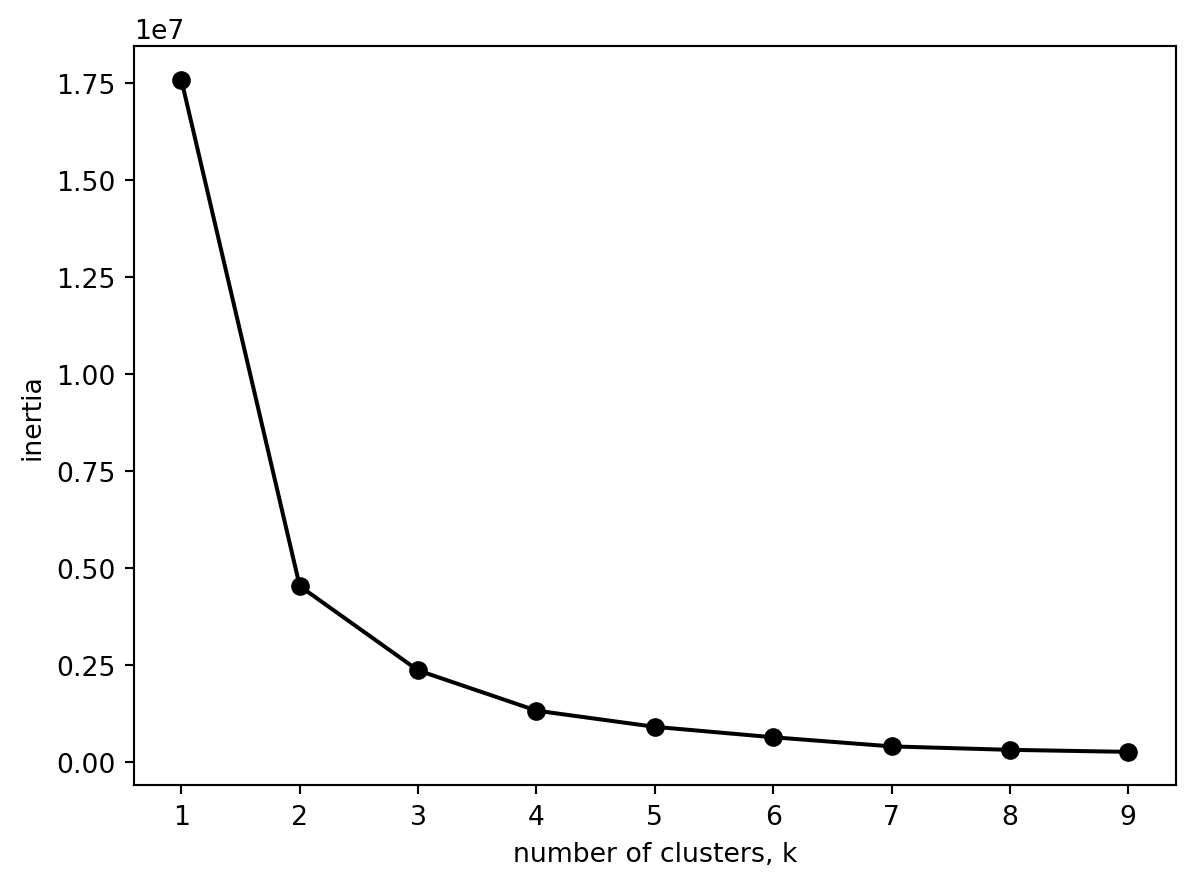

In [9]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init = 10)
    
    # Fit model to samples
    model.fit(df.iloc[:,1:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

import matplotlib.pyplot as plt

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

What happens if we use the normalised data instead?

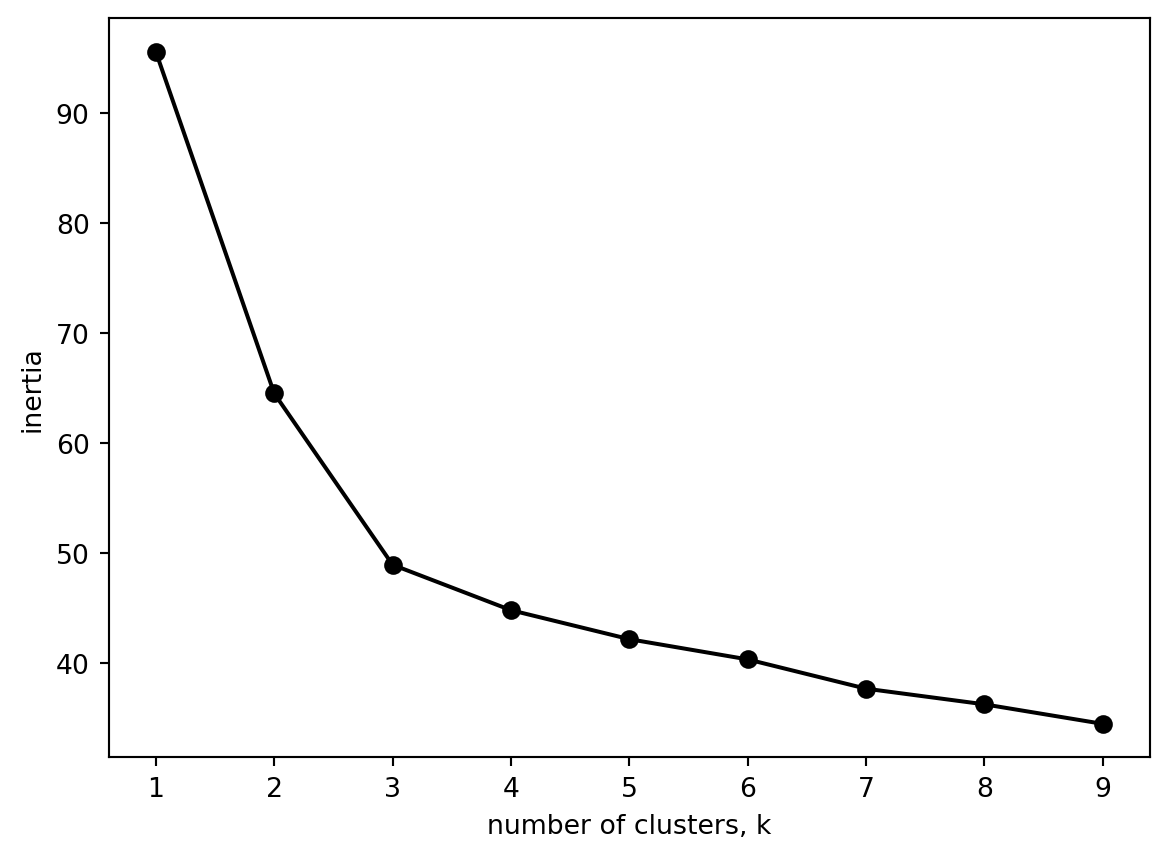

In [10]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init = 10)
    
    # Fit model to samples
    model.fit(df_norm.iloc[:,1:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

import matplotlib.pyplot as plt

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

:::callout-warning
### Pause for thought

Both of the graphs are the same. Is that what you would expect?

:::

Three clusters seems about right (and matches our number of origonal labels).

In [11]:
df['Class label'].value_counts()

Class label
2    71
1    59
3    48
Name: count, dtype: int64

### Computing the clusters

In [12]:
# Create a KMeans instance with k clusters: model
k_means = KMeans(n_clusters=3)

# Fit model to samples
df_k_means = k_means.fit(df.iloc[:,1:])

df['Three clusters'] = pd.Series(df_k_means.predict(df.iloc[:,1:].values), index = df.index)
df

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
..           ...      ...         ...   ...                ...        ...   
173            3    13.71        5.65  2.45               20.5         95   
174            3    13.40        3.91  2.48               23.0        102   
175            3    13.27        4.28  2.26               20.0        120   
176            3    13.17        2.59  2.37               20.0        120   
177            3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline   \
0               5.64  1.04                          3.92      1065   
1               4.38  1.05                          3.40      1050   
2               5.68  1.03                          3.17      1185   
3               7.80  0.86                          3.45      1480   
4               4.32  1.04                          2.93       735   
..               ...   ...                           ...       ...   
173             7.70  0.64                          1.74       740   
174             7.30  0.70                          1.56       750   
175            10.20  0.59                          1.56       835   
176             9.30  0.60                          1.62       840   
177             9.20  0.61                          1.60       560   

     Three clusters  
0                 1  
1                 1  
2                 1  
3                 1  
4                 2  
..              ...  
173               2  
174               2  
175               2  
176               2  
177               0  

[178 rows x 15 columns]

In [13]:
# Create a KMeans instance with k clusters: model
k_means = KMeans(n_clusters=3)

# Fit model to samples using normalised dataframe
df_k_means = k_means.fit(df_norm.iloc[:,1:])

df_norm['Three clusters'] = pd.Series(df_k_means.predict(df_norm.iloc[:,1:].values), index = df_norm.index)
df_norm

Class label   Alcohol  Malic acid       Ash  Alcalinity of ash  \
0              1  0.842105    0.191700  0.572193           0.257732   
1              1  0.571053    0.205534  0.417112           0.030928   
2              1  0.560526    0.320158  0.700535           0.412371   
3              1  0.878947    0.239130  0.609626           0.319588   
4              1  0.581579    0.365613  0.807487           0.536082   
..           ...       ...         ...       ...                ...   
173            3  0.705263    0.970356  0.582888           0.510309   
174            3  0.623684    0.626482  0.598930           0.639175   
175            3  0.589474    0.699605  0.481283           0.484536   
176            3  0.563158    0.365613  0.540107           0.484536   
177            3  0.815789    0.664032  0.737968           0.716495   

     Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
0     0.619565       0.627586    0.573840              0.283019   
1     0.326087       0.575862    0.510549              0.245283   
2     0.336957       0.627586    0.611814              0.320755   
3     0.467391       0.989655    0.664557              0.207547   
4     0.521739       0.627586    0.495781              0.490566   
..         ...            ...         ...                   ...   
173   0.271739       0.241379    0.056962              0.735849   
174   0.347826       0.282759    0.086498              0.566038   
175   0.543478       0.210345    0.073840              0.566038   
176   0.543478       0.231034    0.071730              0.754717   
177   0.282609       0.368966    0.088608              0.811321   

     Proanthocyanins  Color intensity       Hue  OD280/OD315 of diluted wines  \
0           0.593060         0.372014  0.455285                      0.970696   
1           0.274448         0.264505  0.463415                      0.780220   
2           0.757098         0.375427  0.447154                      0.695971   
3           0.558360         0.556314  0.308943                      0.798535   
4           0.444795         0.259386  0.455285                      0.608059   
..               ...              ...       ...                           ...   
173         0.205047         0.547782  0.130081                      0.172161   
174         0.315457         0.513652  0.178862                      0.106227   
175         0.296530         0.761092  0.089431                      0.106227   
176         0.331230         0.684300  0.097561                      0.128205   
177         0.296530         0.675768  0.105691                      0.120879   

     Proline   Three clusters  
0    0.561341               0  
1    0.550642               0  
2    0.646933               0  
3    0.857347               0  
4    0.325963               0  
..        ...             ...  
173  0.329529               1  
174  0.336662               1  
175  0.397290               1  
176  0.400856               1  
177  0.201141               1  

[178 rows x 15 columns]

## Clusters and Ground Truth
Now that we have created three clusters, we may ask ourselves: Do our cluster labels match our ground truth? Did our cluster model capture reality?

In [14]:
ct = pd.crosstab(df['Three clusters'], df['Class label'])
ct

Class label      1   2   3
Three clusters            
0                0  50  19
1               46   1   0
2               13  20  29

And now, we will repeat the same with the normalised dataframe:

In [15]:
ct_norm = pd.crosstab(df_norm['Three clusters'], df_norm['Class label'])
ct_norm

Class label      1   2   3
Three clusters            
0               59   2   0
1                0   7  48
2                0  62   0

It might be easier to see as a stacked plot (see [this post](https://stackoverflow.com/questions/43544694/using-pandas-crosstab-with-seaborn-stacked-barplots)).

Text(0.5, 1.0, 'Clusters and ground truth (original dataset)')

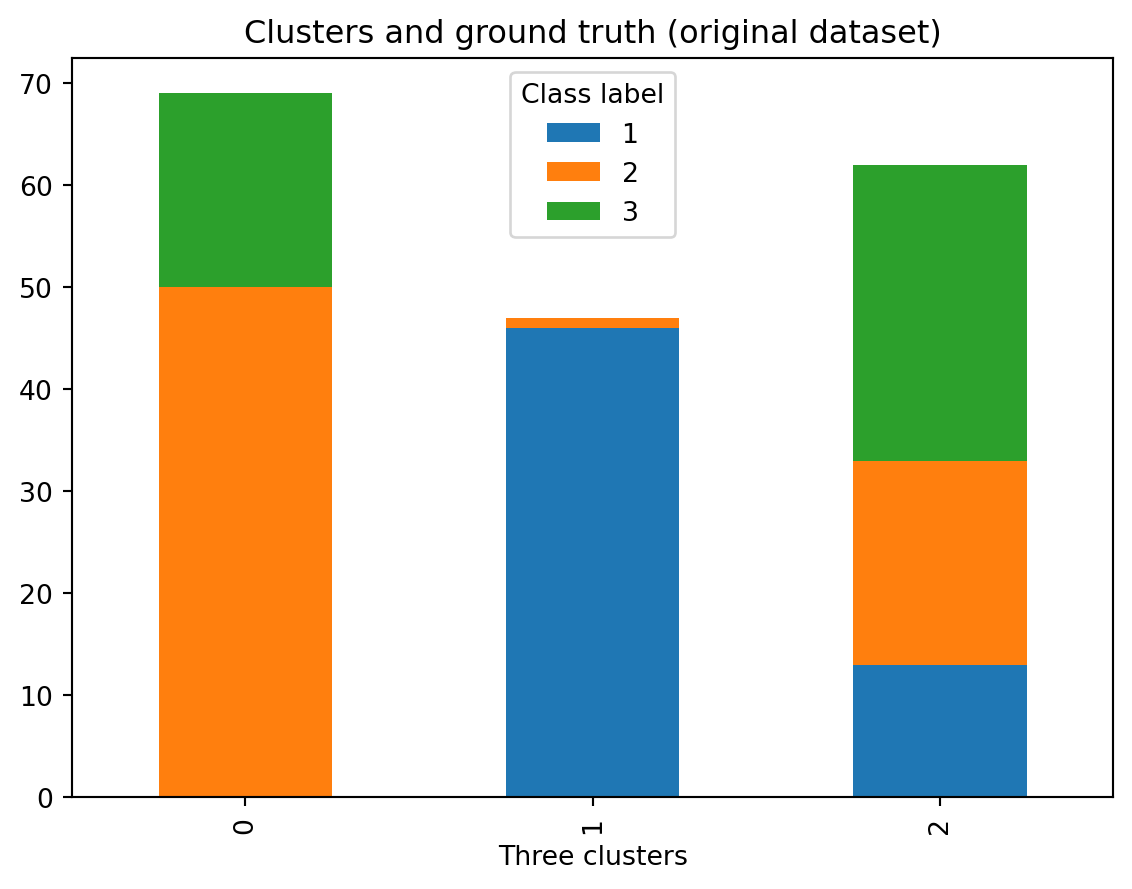

In [16]:
import matplotlib.pyplot as plt
import numpy as np

ct.plot.bar(stacked=True)
plt.legend(title='Class label')
plt.title(label = 'Clusters and ground truth (original dataset)')

And now, we repeat the same, but using the normalised dataset:

Text(0.5, 1.0, 'Clusters and ground truth (normalised dataset)')

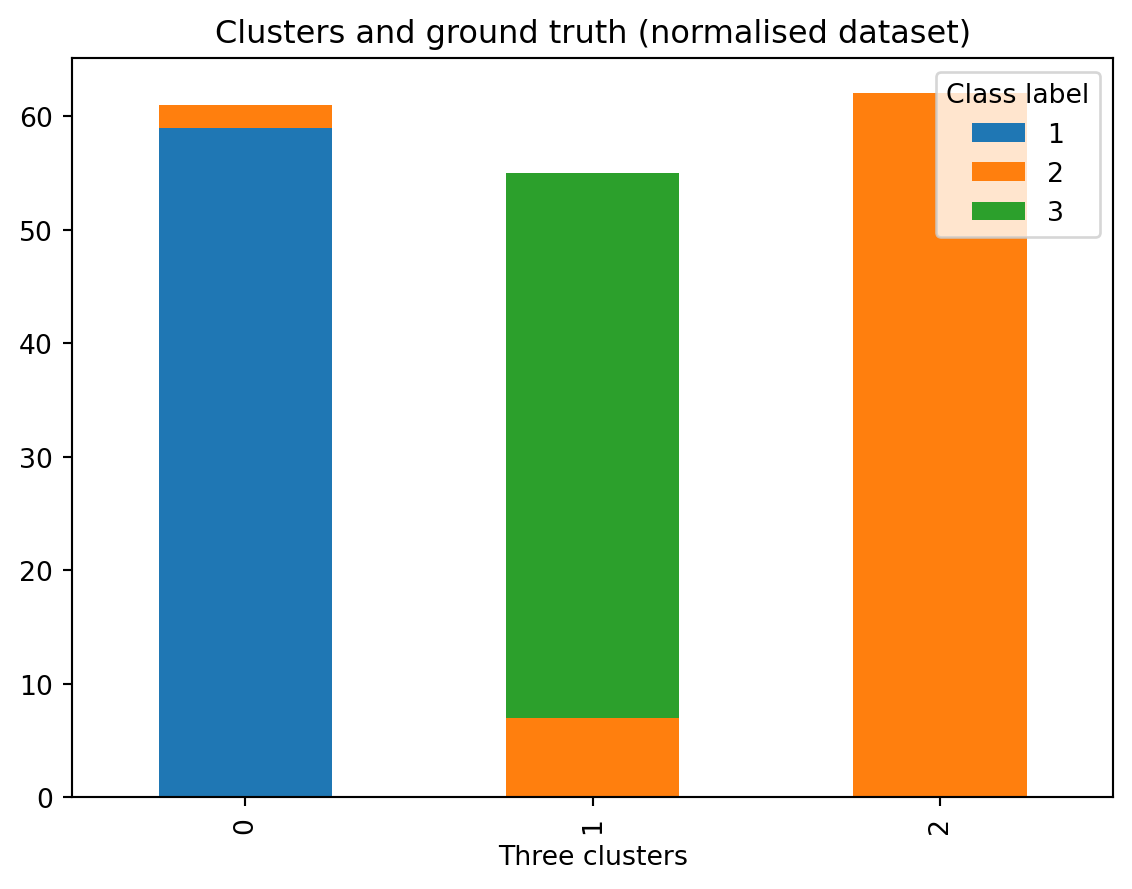

In [17]:
# use the normalised dataset
ct_norm.plot.bar(stacked=True)
plt.legend(title='Class label')
plt.title(label = 'Clusters and ground truth (normalised dataset)')

::: callout-caution

## How has the kmeans model done compared to our ground truth?

1. Check the difference between the clusters using the original dataframe and the normalised dataframe.
2. Reflect on the meaning of the labels: Are the labels from ground truth and cluster labels related somehow? Are the labels meaningful?

:::

::: callout-important

We need to be really careful here. We notice that it is not easily possible to compare the known class labels to clustering labels. The reason is that the clustering algorithm labels are just arbitrary and not assigned to any deterministic criteria. Each time you run the algorithm, you might get a different id for the labels. **The reason is that the label itself doesn't actually mean anything, what is important is the list of items that are in the same cluster and their relations.**

:::

### Principal Components Analysis

A way to come over this ambiguity and evaluate the results is to look at a visualisations of the results and compare. But this brings in the question of what type of visualisation to use for looking at the clusters. An immediate alternative is to use scatterplots. However, it is not clear which axis to use for clustering. A common method to apply at this stage is to make use of PCA to get a 2D plane where we can project the data points and visualise them over this projection.

In [18]:
# We will be excluding the column `Class label` located in the first position from the PCA.
df.iloc[:,1:14]

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280/OD315 of diluted wines  Proline   
0                            3.92      1065  
1                            3.40      1050  
2                            3.17      1185  
3                            3.45      1480  
4                            2.93       735  
..                            ...       ...  
173                          1.74       740  
174                          1.56       750  
175                          1.56       835  
176                          1.62       840  
177                          1.60       560  

[178 rows x 13 columns]

And now, with the normalised dataset:

In [19]:
# We will be excluding the column `Class label` located in the first position from the PCA.
df_norm.iloc[:,1:14]

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0    0.842105    0.191700  0.572193           0.257732   0.619565   
1    0.571053    0.205534  0.417112           0.030928   0.326087   
2    0.560526    0.320158  0.700535           0.412371   0.336957   
3    0.878947    0.239130  0.609626           0.319588   0.467391   
4    0.581579    0.365613  0.807487           0.536082   0.521739   
..        ...         ...       ...                ...        ...   
173  0.705263    0.970356  0.582888           0.510309   0.271739   
174  0.623684    0.626482  0.598930           0.639175   0.347826   
175  0.589474    0.699605  0.481283           0.484536   0.543478   
176  0.563158    0.365613  0.540107           0.484536   0.543478   
177  0.815789    0.664032  0.737968           0.716495   0.282609   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         0.627586    0.573840              0.283019         0.593060   
1         0.575862    0.510549              0.245283         0.274448   
2         0.627586    0.611814              0.320755         0.757098   
3         0.989655    0.664557              0.207547         0.558360   
4         0.627586    0.495781              0.490566         0.444795   
..             ...         ...                   ...              ...   
173       0.241379    0.056962              0.735849         0.205047   
174       0.282759    0.086498              0.566038         0.315457   
175       0.210345    0.073840              0.566038         0.296530   
176       0.231034    0.071730              0.754717         0.331230   
177       0.368966    0.088608              0.811321         0.296530   

     Color intensity       Hue  OD280/OD315 of diluted wines  Proline   
0           0.372014  0.455285                      0.970696  0.561341  
1           0.264505  0.463415                      0.780220  0.550642  
2           0.375427  0.447154                      0.695971  0.646933  
3           0.556314  0.308943                      0.798535  0.857347  
4           0.259386  0.455285                      0.608059  0.325963  
..               ...       ...                           ...       ...  
173         0.547782  0.130081                      0.172161  0.329529  
174         0.513652  0.178862                      0.106227  0.336662  
175         0.761092  0.089431                      0.106227  0.397290  
176         0.684300  0.097561                      0.128205  0.400856  
177         0.675768  0.105691                      0.120879  0.201141  

[178 rows x 13 columns]

In [20]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components=n_components)
df_pca = pca.fit(df.iloc[:,1:14])
df_pca_vals = df_pca.transform(df.iloc[:,1:14])

Again, we are repeating the same, but using the normalised dataframe:

In [21]:
# We are repeating the same, with the normalised dataframe.

from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components=n_components)
df_pca_norm = pca.fit(df_norm.iloc[:,1:14])
df_pca_norm_vals = df_pca_norm.transform(df_norm.iloc[:,1:14])

Grab our projections and plot along with our cluster names.

Text(0.5, 1.0, 'Known labels visualised over PCs (Original data)')

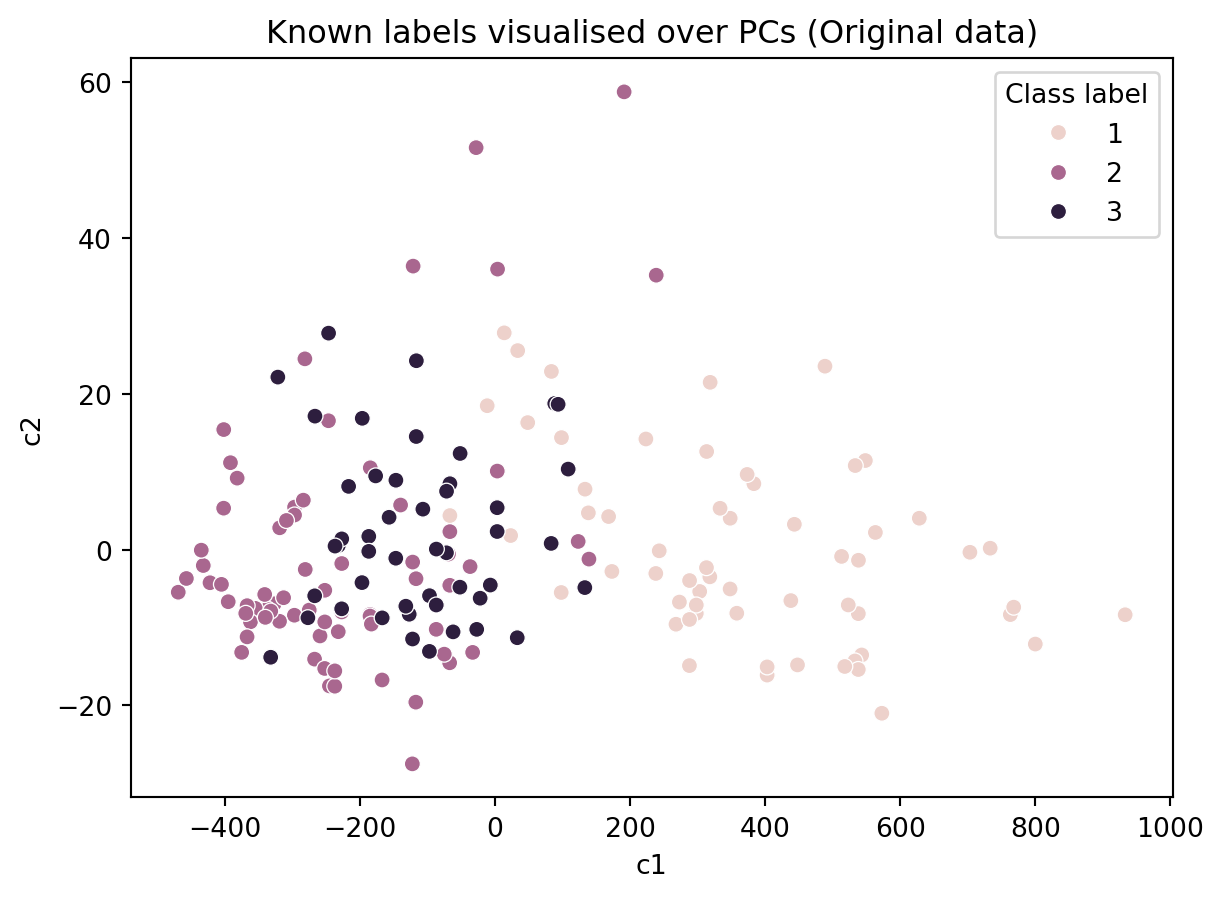

In [22]:
# Store components as a new column in the original dataframe.
df['c1'] = [item[0] for item in df_pca_vals]
df['c2'] = [item[1] for item in df_pca_vals]

ax = sns.scatterplot(data = df, x = 'c1', y = 'c2', hue = 'Class label')
ax.set_title('Known labels visualised over PCs (Original data)')

And the same, with the normalised dataframe:

Text(0.5, 1.0, 'Known labels visualised over PCs (Normalised data)')

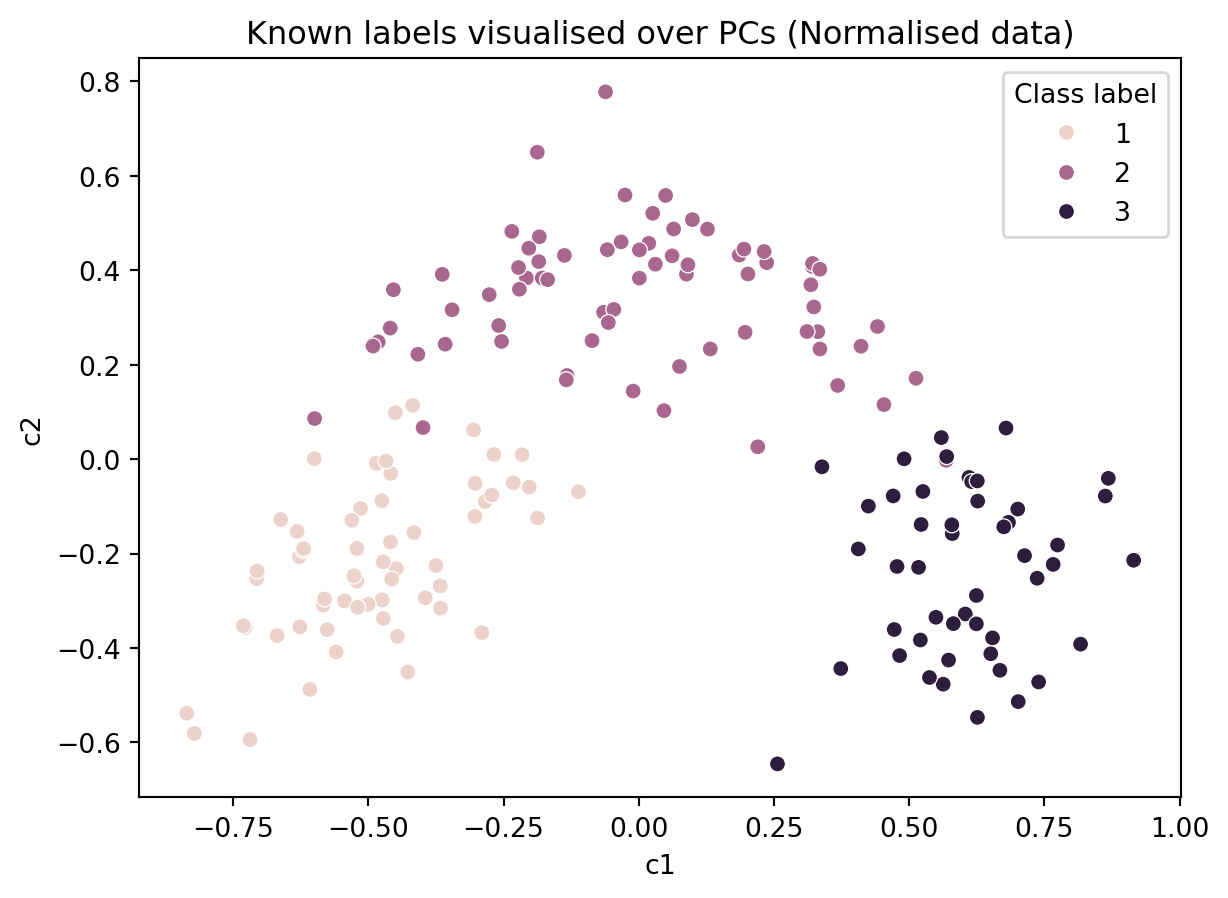

In [23]:
# We are repeating the same, with the normalised dataframe.

# Store components as a new column in the normalised dataframe.
df_norm['c1'] = [item[0] for item in df_pca_norm_vals]
df_norm['c2'] = [item[1] for item in df_pca_norm_vals]

ax = sns.scatterplot(data = df_norm, x = 'c1', y = 'c2', hue = 'Class label')
ax.set_title('Known labels visualised over PCs (Normalised data)')

In the figure above, we colored the points based on the actual labels, we observe that there has been several misclassifications in the figure above (i.e., in the algorithm's results). So one may choose to use an alternative algorithm or devise a better distance metric.

Text(0.5, 1.0, 'Results of the algorithm visualised over PCs (Original data)')

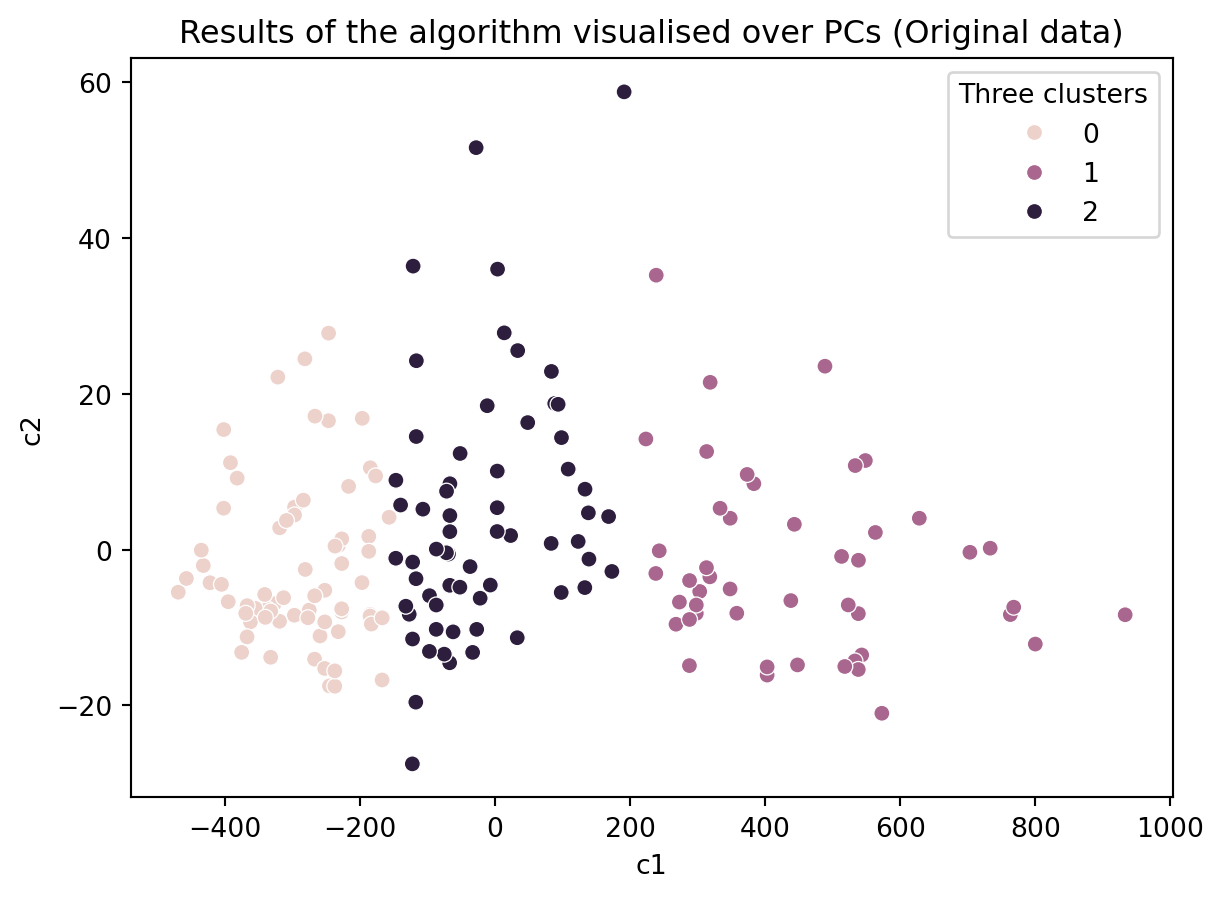

In [24]:
ax = sns.scatterplot(data = df, x = 'c1', y = 'c2', hue = 'Three clusters')
ax.set_title('Results of the algorithm visualised over PCs (Original data)')

Text(0.5, 1.0, 'Results of the algorithm visualised over PCs (Normalised data)')

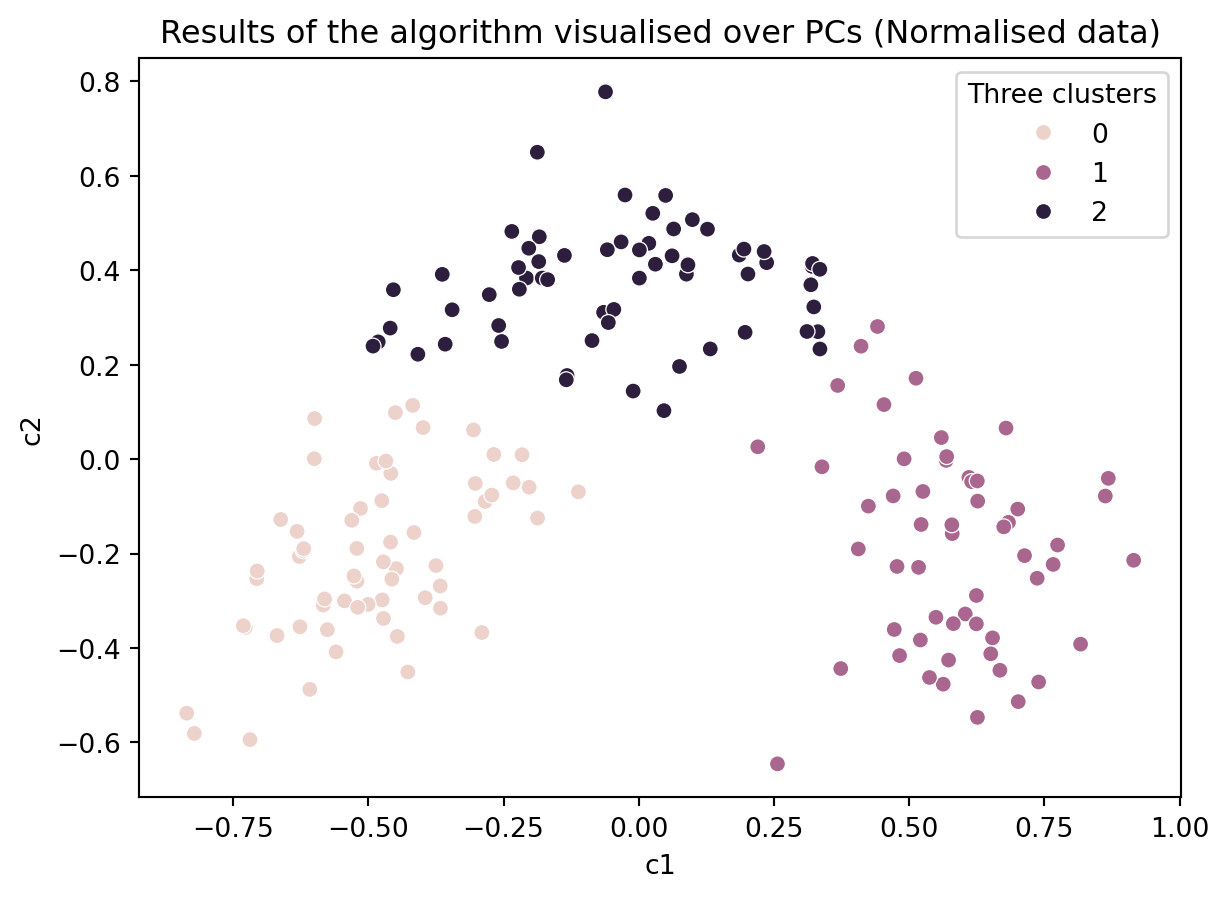

In [25]:
# We are repeating the same, with the normalised dataframe.
ax = sns.scatterplot(data = df_norm, x = 'c1', y = 'c2', hue = 'Three clusters')
ax.set_title('Results of the algorithm visualised over PCs (Normalised data)')

This shows the parallelism between the clustering algorithm and PCA. By looking at the PCA loadings, we can find out what the x-axis mean and try to interpret the clusters (We leave this as an additional exercise for those interested).

How might your interpret the above plots? Did the kmeans model identify the ground truth?

How robust is our clustering? It may be that the kmeans algorithm becamse stuck or that a few outliers have biased the clustering.

Two ways to check are:

* Running the model multiple times with different initial values.
* Removing some data and running the modelling multiple times.


### Running the model multiple times

Run the below cell a few times. What do you see?

Text(0.5, 1.0, 'Results of the algorithm visualised over PCs (Original data)')

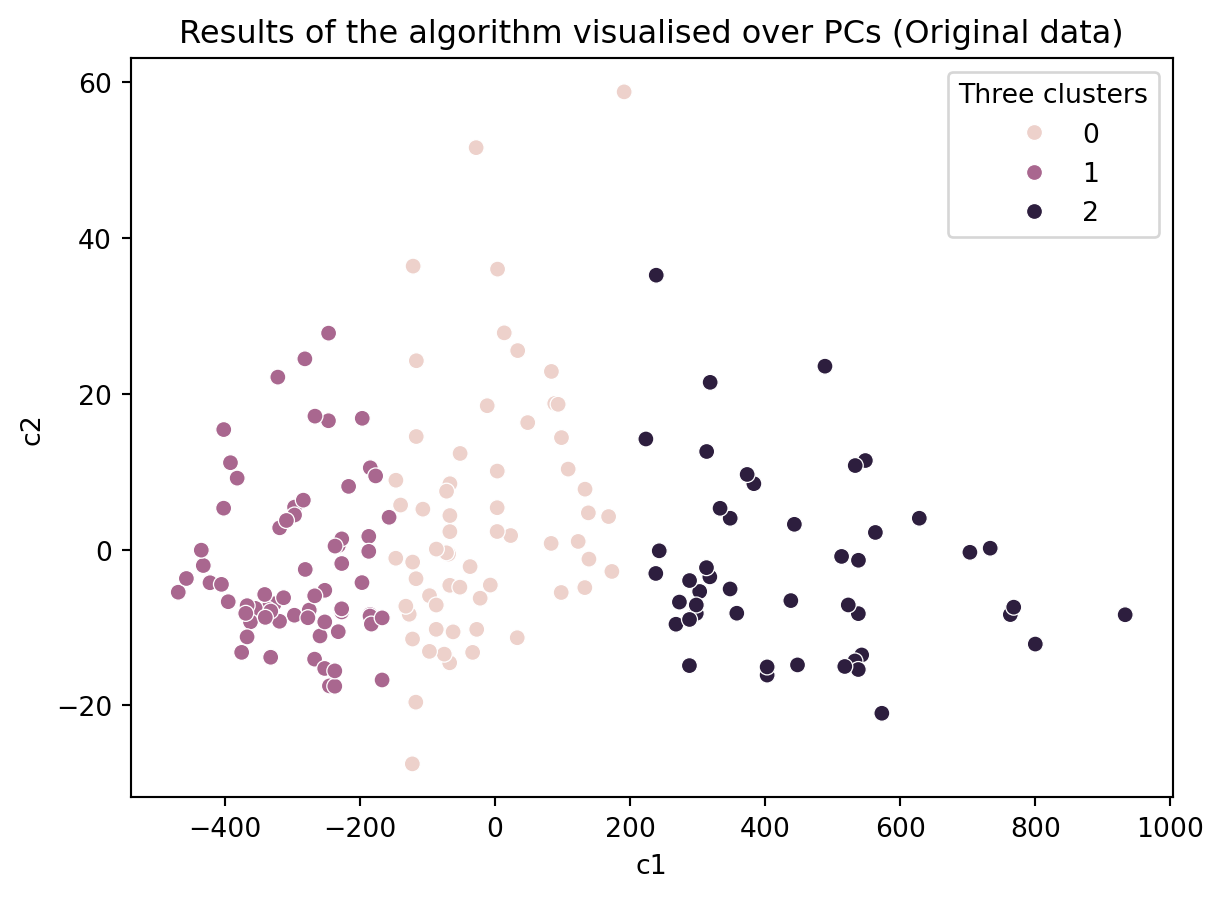

In [26]:
# Create a KMeans instance with k clusters: model
k_means = KMeans(n_clusters=3, init='random', n_init = 10)

# Fit model to samples
df_k_means = k_means.fit(df.iloc[:,1:14])

df['Three clusters'] = pd.Series(df_k_means.predict(df.iloc[:,1:14].values), index = df.index)

ax = sns.scatterplot(data = df, x = 'c1', y = 'c2', hue = 'Three clusters')
ax.set_title('Results of the algorithm visualised over PCs (Original data)')

Text(0.5, 1.0, 'Results of the algorithm visualised over PCs (Normalised data)')

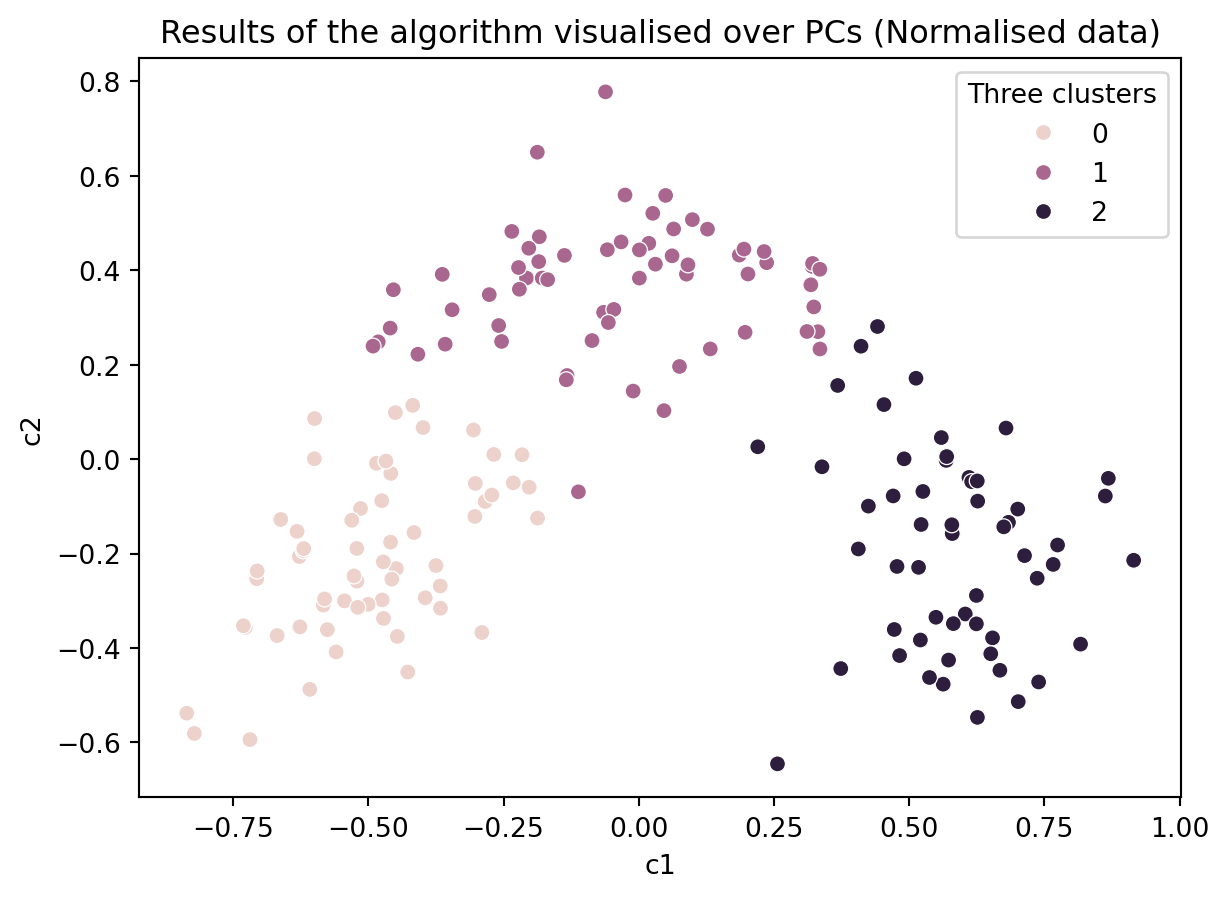

In [27]:

# Create a KMeans instance with k clusters: model
k_means = KMeans(n_clusters=3, init='random', n_init = 10)

# Fit model to samples
df_norm_k_means = k_means.fit(df_norm.iloc[:,1:14])

df_norm['Three clusters'] = pd.Series(df_norm_k_means.predict(df_norm.iloc[:,1:14].values), index = df.index)

ax = sns.scatterplot(data = df_norm, x = 'c1', y = 'c2', hue = 'Three clusters')
ax.set_title('Results of the algorithm visualised over PCs (Normalised data)')

### Removing some data

How about with only 80% of the data?

Text(0.5, 1.0, 'Results of the algorithm visualised over PCs')

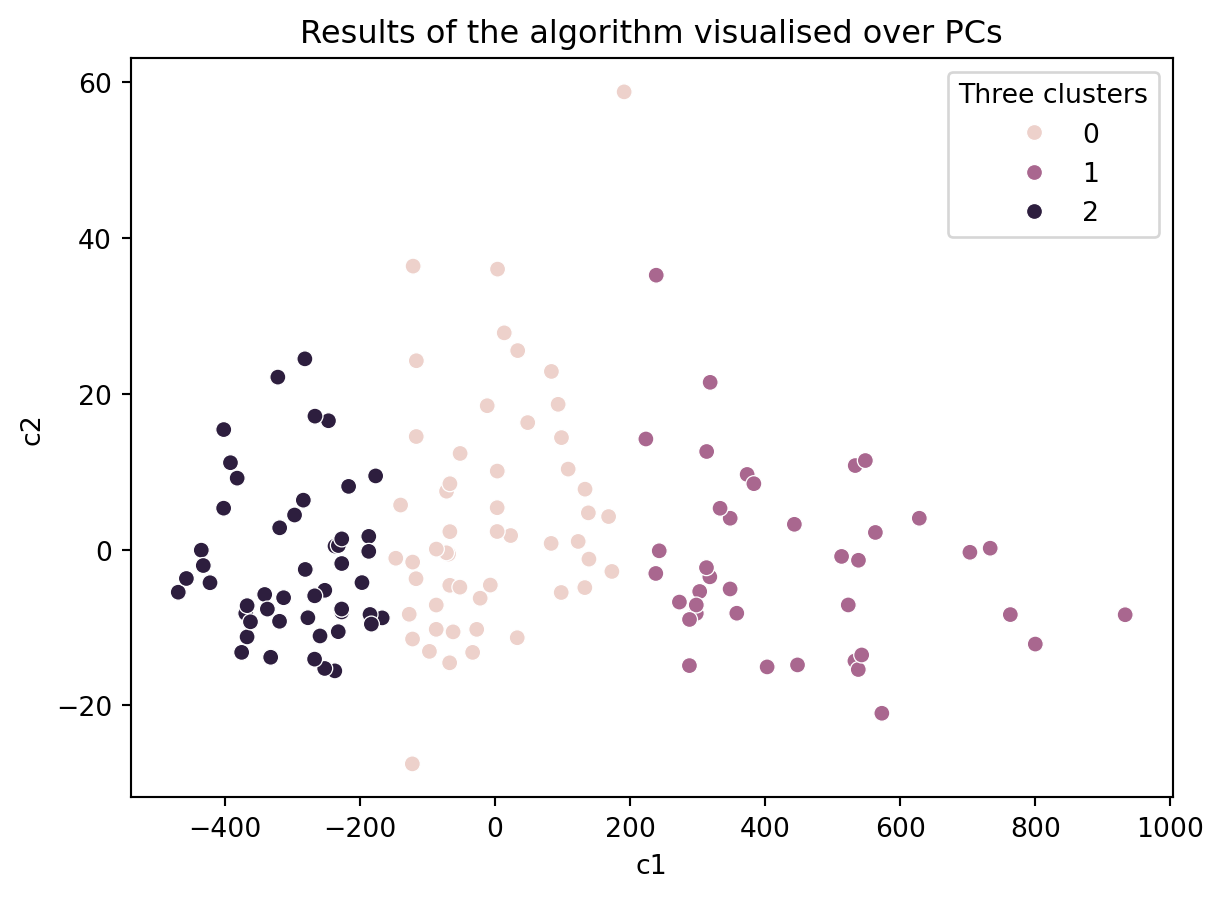

In [28]:
df_sample = df.sample(frac=0.8, replace=False)

# Create a KMeans instance with k clusters: model
k_means = KMeans(n_clusters=3, init='random', n_init = 10)

# Fit model to samples
df_k_means = k_means.fit(df_sample.iloc[:,1:14])

df_sample['Three clusters'] = pd.Series(df_k_means.predict(df_sample.iloc[:,1:14].values), index = df_sample.index)

ax = sns.scatterplot(data = df_sample, x = 'c1', y = 'c2', hue = 'Three clusters')
ax.set_title('Results of the algorithm visualised over PCs')

We may want to automate the process of resampling the data or rerunning the model then perhaps plotting the different inertia values or creating different plots.

Do you think our clustering algorithm is stable and provide similiar results even when some data is removed or the initial values are random?

If so, then is our algorithm capturing the ground truth?